<a href="https://colab.research.google.com/github/jinInoue-rrr/from_scratch/blob/main/deep_from_scratch_ch3_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.1 パーセプトロンからニューラルネットワークへ

<br />

ニューラルネットワークは、適切な重みパラメータをデータから自動で学習できるという点が優れている。先ほどまでのパーセプトロンは重みを自分で決めていたので。それが適切かどうかはわからない。重みとバイアスの値が発火のしやすさに関わるから。

### 3.1.1 NNの例

入力層(0)、中間層(1)（隠れ層）、出力層(2)の３つ

ゼロ層から始める方が、pythonのインデックスと相性がいい。

n層のネットワークは、重みがあるのは(n-1)層分だけ。なので、(n-1)層ネットワークと呼ぶ

### 3.1.2 パーセプトロンの復習

<br />

$h(x)$：活性化関数...入力信号の総和が0を下回るなら、出力0を、0を上回るなら1を返す関数

本書ではニューロンとノードを同じ意味で扱う

一般的に単純パーセプトロンといえば、それは単層のネットワークで、活性化関数に閾値を境に出力が切り替わるステップ関数を利用したモデルのことを指す。
多層パーセプトロンというと、これは多層で滑らかな活性化関数を使用するネットワークを指すのが一般的 

## 3.2 活性化関数

<br />

簡単な発想の飛躍で、それまで離散的というか、ぶつ切りになっていたステップ関数をより滑らかなものに変えたら、性能がどうなるのか？は当然気になるところ。

<br />

### 3.2.1 シグモイド関数

$h(x) = \frac{1}{1 + exp(-x)} ... (3.6)$

である。ニューラルネットワークでは、活性化関数にシグモイド関数を用いて信号の変換を行い、その変換された信号が次のニューロンに入力として伝えられる。パーセプトロンとNNの違いは、この活性化関数の違いのみである。


##### Colaboratory環境設定

#### Drive内にディレクトリを設定する

In [69]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [70]:
import os

In [71]:
os.getcwd()

'/content'

In [74]:
os.chdir("/content/drive/My Drive/deep-learning-from-scratch-master/ch03")

In [75]:
os.getcwd()

'/content/drive/My Drive/deep-learning-from-scratch-master/ch03'

In [4]:
### 3.2.2 ステップ関数の実装

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [5]:
##先の実装だと、入力にnumpyが入りづらい

def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [6]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [7]:
y = x > 0

In [8]:
y#0より大きいかどうかの真偽値をとるnumpy配列が生成されたが、これだと使い勝手が悪いので、True = 1, False = 0の変換を施している

array([False,  True,  True])

### 3.2.3 ステップ関数のグラフ



In [9]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)



In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

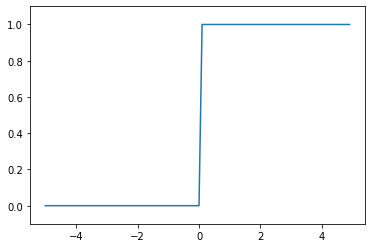

In [11]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()#ステップ関数（階段関数）


### 3.2.4 シグモイド関数の実装



In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
  
#sigmoid関数はスカラーに対応するが、xがnumpy配列でも、numpy配列のブロードキャスト機能によって、ベクトルとして出力される

In [14]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

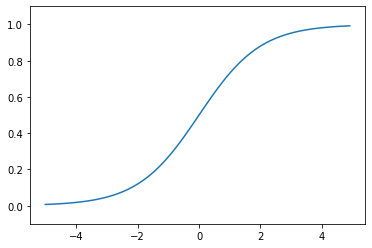

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [16]:
# 活性化関数に非線形な関数を用いる理由は、線形な関数だと層を厚くする意味がなくなるため。

### 3.2.7 ReLU関数

<br />

Rectified Linear Unit ... 入力が0を超えていれば、そのまま出力し、0を下回るなら0を返すという関数

In [17]:
#ReLU関数の実装は簡単

def ReLU(x):
    return np.maximum(0, x)

## 3.3 多次元配列の計算

<br />

### 3.3.1 多次元配列




In [18]:
import numpy as np

A = np.array([1, 2, 3, 4])

In [19]:
print(A)

[1 2 3 4]


In [20]:
np.ndim(A)

1

In [21]:
A.shape#タプルが返されることに注意

(4,)

In [22]:
A.shape[0]

4

In [23]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [24]:
np.ndim(B)

2

In [25]:
B.shape

(3, 2)

In [26]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [27]:
B = np.array([[5, 6], [7, 8]])

In [28]:
B.shape

(2, 2)

In [30]:
#アダマール積ではなく、行列の積（ドット積）を計算する

np.dot(A, B)#Aの第一行とBの第一列の内積、Aの第二行とBの第一列の内積、 Aの第一行とBの第二列の内積、 Aの第二行とBの第二列の内積の4つを計算

array([[19, 22],
       [43, 50]])

In [31]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])

In [32]:
A.shape

(2, 3)

In [33]:
B.shape

(3, 2)

In [34]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

### 3.3.3 ニューラルネットワークの行列の積

In [36]:
X = np.array([1, 2])

In [37]:
X.shape

(2,)

In [39]:
W = np.array([[1, 3, 5], [2, 4, 6]])
W.shape

(2, 3)

In [40]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 3.4 3層のニューラルネットワークの実装

<br />



In [43]:
X = np.array([1.0, 0.5])# 1*2ベクトル
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) #2 * 3ベクトル
B1 = np.array([0.1, 0.2, 0.3]) # 1 * 3ベクトル

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [44]:
Z1 = sigmoid(A1)

In [45]:
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [46]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [47]:
print(Z1.shape)

(3,)


In [48]:
print(W2.shape)

(3, 2)


In [49]:
print(B2.shape)

(2,)


In [50]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [51]:
def identity_function(x):
    return x

In [52]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [53]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)#恒等関数...出力層の活性化関数


##### 恒等関数について

<br />

解く問題が分類問題なら、最後の出力層の活性化関数はsigmoid関数、多クラス分類ではsoftmax関
数、回帰ならそのまま出力する恒等関数を用いる


### 3.4.3 NN実装のまとめ



In [54]:
#重みとバイアスの初期化を行い、それらをdictionary型の変数networkに格納する

def init_network():
    network = {}#これは？
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])#まず、0→1の重みを、2, 3行列で表す
    network["b1"] = np.array([0.1, 0.2, 0.3])#0→1のバイアスを1, 3ベクトルで表す
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # 1→2の重みを、3, 2行列で表す
    network["b2"] = np.array([0.1, 0.2]) # 1→2の重みを、1,2ベクトルで表す
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])

    return network


In [55]:
#入力が出力に変換されるプロセスをまとめて実装
#入力から出力に向かう方向をforwardとかいう

def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1#0→1の入力、重みと入力の線形和とバイアスの合計をベクトルとして格納。行はそれぞれ次の層のニューロンの番号に対応している
    z1 = sigmoid(a1) # 0→1の入力を活性化関数sigmoidによって出力に変換する
    a2 = np.dot(z1, W2) + b2 #1→2の入力、重みと入力の線形和とバイアスの合計をベクトルとして格納。以下同文
    z2 = sigmoid(a2)#z1と同様
    a3 = np.dot(z2, W3) + b3 # 2 →3の入力、重みと入力の線形和とバイアスの合計を二次元ベクトルとして格納。この時点で出力層の次元と一致している。
    y = identity_function(a3) #恒等関数によって最後の出力層に出す

    return y

In [56]:
network = init_network()
x = np.array([1.0, 0.5])#ここでは、入力ベクトルのみが必要とされる
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 出力層の設計

<br />

回帰なら出力層に恒等関数、分類問題ならsoftmax関数を用いる

### 3.5.1 恒等関数とソフトマックス関数

$y_k = \frac{exp(a_k)}{\sum_{i = 1}^n exp(a_i)} ... (3.10)$ 

<br />

ここでは、手前の出力層のニューロンがn個あるとして、そこからk番目の出力を求めている



In [57]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [58]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a/sum_exp_a
print(y)


74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [59]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 softmax関数の実装上の注意

In [61]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [62]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [63]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [64]:
#オーバーフロー対策を含めたsoftmaxの定義

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a

    return y



In [65]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [66]:
np.sum(softmax(a))#ソフトマックス関数の出力の総和は1になるため、それぞれを確率として解釈することができる

1.0

In [76]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [77]:
(x_train, t_train), (x_test, t_tset) = load_mnist(flatten = True, normalize = False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [78]:
print(x_train.shape)

(60000, 784)


In [79]:
print(t_train.shape)

(60000,)


In [80]:
print(x_test.shape)

(10000, 784)


In [83]:
t_test = t_tset
print(t_test.shape)

(10000,)


In [85]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


In [91]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

    

In [87]:
(x_train, t_train),  (x_test, t_test) = load_mnist(flatten = True, normalize = False)#訓練データとテストデータをそれぞれタプルで保存している

In [88]:
img = x_train[0]
label = t_train[0]
print(label)

5


In [89]:
print(img.shape)

(784,)


In [94]:
img = img.reshape(28, 28)
print(img.shape)

img_show(img)#画像が表示されない！

(28, 28)


### 3.6.2 ニューラルネットワークの推論処理

<br />

入力層は28*28 = 784層、出力層は0から9の数字に対応した10層

In [100]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test #テストデータを返す

In [105]:
def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)

    return network

In [106]:
def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]#ここでは、元のnetworkディクショナリからkeyを使ってvalueを取り出し、それらを関数内部のlocal変数として代入している

    a1 = np.dot(x, W1) + b1 #0→1重みづけされた出力とバイアスの総和を格納
    z1 = sigmoid(a1)#活性化関数で出力
    a2 = np.dot(z1, W2) + b2#1→2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3#2→3
    y = softmax(a3)#本来出力層にsoftmaxをおく必要はないが、一応

    return y

In [107]:
##### 学習済みのモデルを用いて、NNによる推論処理を行う

x, t = get_data()
network = init_network()



In [115]:
print(len(x))
print(len(t))


10000
10000


In [117]:
k = predict(network, x[12])
print(k)#確率が出力されている

[1.9399713e-05 9.9420913e-06 6.3759464e-05 5.2130606e-04 1.7703691e-02
 3.5293537e-04 6.0706952e-06 1.5150991e-02 9.9095097e-04 9.6518099e-01]


In [119]:
probable = np.argmax(k)
print(probable)

9


In [120]:

#初期設定、正解数のカウント
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i]) #当てはめて予測
    p = np.argmax(y)#予測された各ラベルに対する確率の中で、最も高いものインデックスをpに格納。なおインデックスとラベルが対応していると考えて良さそう

    if p == t[i]:#最も確率が高いラベルのインデックスが、教師データの中身と
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt)/len(x)))#93%の精度

Accuracy:0.9352


### 3.6.3 バッチ処理




In [121]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network["W1"], network["W2"], network["W3"]


In [123]:
x.shape

(10000, 784)

In [124]:
x[0].shape#10000×784行列を上からスライスしているイメージ

(784,)

In [125]:
W1.shape

(784, 50)

In [126]:
W2.shape

(50, 100)

In [127]:
W3.shape

(100, 10)

##### バッチ

<br />

 Xのような、まとまりのある入力データをバッチ(batch)と呼ぶ。束的な。

In [128]:
# バッチ処理によるNNの実装

x, t = get_data()
network = init_network()

batch_size  = 100#バッチの数
accuracy_cnt = 0#初期化

for i in range(0, len(x), batch_size):#stepサイズがbatch_sizeとイコールになるので、batchごとに処理を行うということか？iは0,から100ごとに飛んでいる ,,,,,(正確にbatch_sizeごとに増加している)
    x_batch = x[i:i + batch_size]#0から100, 100から200, 200から300, 300から400, 400から~という感じ
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])#batchのグループごとに正解している数をブーリアンのnumpy配列として作成し、その値を合計した分だけaccuracy_cntを増加させる

print("Accuracy:" + str(float(accuracy_cnt)/len(x)))#最終的な正解数accuracy_cntを、xのサイズで割ることで正答率を出す




Accuracy:0.9352
